### Download and Prepare MNIST Dataset

In [1]:
from mnist_utils import prepare_mnist

mnist_data = prepare_mnist('data')

train_images = mnist_data[0][0]
train_labels = mnist_data[0][1]
test_images = mnist_data[1][0]
test_labels = mnist_data[1][1]

Found train-labels-idx1-ubyte.gz Data
Found train-images-idx3-ubyte.gz Data
Found t10k-labels-idx1-ubyte.gz Data
Found t10k-images-idx3-ubyte.gz Data
Finished downloading and extracting MNIST, loading data...
MNIST ready


### Split to Training and Validation

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, 
                                                  train_labels, 
                                                  test_size=0.1, 
                                                  random_state=42)

print('Training features: ' + str(len(X_train)))
print('Training labels: ' + str(len(y_train)))
print('Validation features: ' + str(len(X_val)))
print('Validation labels: ' + str(len(y_val)))

Training features: 54000
Training labels: 54000
Validation features: 6000
Validation labels: 6000


### Hyperparameters

In [3]:
epochs = 100
batch_size = 32
learning_rate = 3.0
input_nodes = 28 * 28
hidden_nodes = 30
output_nodes = 10
regularization = 0.001
keep_probability = 0.75

### Build the Network

In [4]:
from neural_network import NeuralNetwork
from activations import Activations
from regularizations import L2

neural_network = NeuralNetwork(learning_rate)
neural_network.add_layer(input_nodes)
neural_network.add_layer(hidden_nodes, Activations.sigmoid, L2(regularization), keep_probability)
neural_network.add_layer(hidden_nodes, Activations.sigmoid, L2(regularization), keep_probability)
neural_network.add_layer(output_nodes, Activations.sigmoid, L2(regularization))

### Train the Network

In [5]:
import sys

import numpy as np

from helper import get_batch, mean_squared_error

losses = { 'train': [], 'validation': [] }

for epoch in range(epochs):
    n_batches = len(X_train) / batch_size
    for batch_i in range(n_batches):
        X, y = get_batch(X_train, y_train, batch_i, batch_size)
        neural_network.train(X, y)
    train_results = np.asarray([np.argmax(neural_network.predict(x)) for x in X_train])
    train_loss = mean_squared_error(train_results, np.argmax(y_train))
    val_results = np.asarray([np.argmax(neural_network.predict(x)) for x in X_val])
    val_loss = mean_squared_error(val_results, np.argmax(y_val))
    sys.stdout.write("Progress: {:2.1f}".format(100 * epoch / float(epochs)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5] + '\n')
    sys.stdout.flush()
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 0.0% ... Training loss: 19.66 ... Validation loss: 15.36
Progress: 1.0% ... Training loss: 19.78 ... Validation loss: 15.36
Progress: 2.0% ... Training loss: 20.01 ... Validation loss: 15.09
Progress: 3.0% ... Training loss: 19.98 ... Validation loss: 15.06
Progress: 4.0% ... Training loss: 19.91 ... Validation loss: 15.00
Progress: 5.0% ... Training loss: 19.92 ... Validation loss: 14.99
Progress: 6.0% ... Training loss: 20.05 ... Validation loss: 14.87
Progress: 7.0% ... Training loss: 20.00 ... Validation loss: 14.97
Progress: 8.0% ... Training loss: 19.99 ... Validation loss: 14.98
Progress: 9.0% ... Training loss: 20.17 ... Validation loss: 14.94
Progress: 10.0% ... Training loss: 20.22 ... Validation loss: 14.99
Progress: 11.0% ... Training loss: 20.21 ... Validation loss: 14.96
Progress: 12.0% ... Training loss: 20.24 ... Validation loss: 14.95
Progress: 13.0% ... Training loss: 20.24 ... Validation loss: 14.86
Progress: 14.0% ... Training loss: 20.12 ... Validation lo

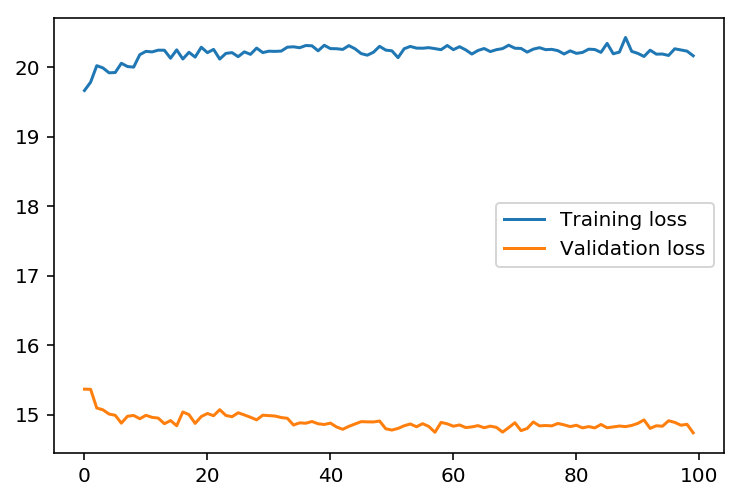

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

### Test the Network

In [7]:
import sys

import numpy as np

network_predictions = [np.argmax(neural_network.predict(x)) for x in test_images]
correct_predictions = sum(int(x == y) for x, y in zip(network_predictions, test_labels))
sys.stdout.write("Test accuracy: {:2.1f}"
                 .format(100 * correct_predictions / float(len(test_images))) + "%")
sys.stdout.flush()

Test accuracy: 94.0%